## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [4]:
N = 20000
df = pd.read_csv("~/data/data_000637.txt", sep=",", header=0, nrows=N, dtype=np.int64)

print(df)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0         1     0          123  3869200167        2374        26
1         1     0          124  3869200167        2374        27
2         1     0           63  3869200167        2553        28
3         1     0           64  3869200167        2558        19
4         1     0           64  3869200167        2760        25
...     ...   ...          ...         ...         ...       ...
19995     1     0           27  3869200366        2513        29
19996     1     0           63  3869200366        2517         6
19997     1     0           32  3869200366        2519         5
19998     1     0           17  3869200366        2522        21
19999     1     0           64  3869200366        2522         0

[20000 rows x 6 columns]



2\. Find out the number of BX in a ORBIT (the value 'x').

In [5]:
BX_COUNTER = np.array(df["BX_COUNTER"].drop_duplicates().values)

print(f"The maximun number of BX in a orbit is: {max(BX_COUNTER)+1}")

The maximun number of BX in a orbit is: 3564



3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [6]:
ORBIT_CNT = np.array(df["ORBIT_CNT"].drop_duplicates().values)

min_orbit = min(ORBIT_CNT)
max_orbit = max(ORBIT_CNT)
time_approx = (max_orbit -min_orbit)*3564*25.e-09*100
print(f"Approximately the taking lasted {time_approx}ms")

Approximately the taking lasted 1.77309ms



4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).


In [7]:
time = np.array([row["ORBIT_CNT"]*3564+row["BX_COUNTER"]+row["TDC_MEAS"]/30.  for index, row in df.iterrows()])*25.e-09
df["time (s)"] = time

print(df)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0         1     0          123  3869200167        2374        26   
1         1     0          124  3869200167        2374        27   
2         1     0           63  3869200167        2553        28   
3         1     0           64  3869200167        2558        19   
4         1     0           64  3869200167        2760        25   
...     ...   ...          ...         ...         ...       ...   
19995     1     0           27  3869200366        2513        29   
19996     1     0           63  3869200366        2517         6   
19997     1     0           32  3869200366        2519         5   
19998     1     0           17  3869200366        2522        21   
19999     1     0           64  3869200366        2522         0   

            time (s)  
0      344745.734939  
1      344745.734939  
2      344745.734944  
3      344745.734944  
4      344745.734949  
...              ...  
19995  344745.752673  


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.


In [8]:
newHead = np.random.randint(low=0, high=2, size=df.shape[0])
df["HEAD"] = newHead

print(df)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0         0     0          123  3869200167        2374        26   
1         1     0          124  3869200167        2374        27   
2         0     0           63  3869200167        2553        28   
3         0     0           64  3869200167        2558        19   
4         1     0           64  3869200167        2760        25   
...     ...   ...          ...         ...         ...       ...   
19995     1     0           27  3869200366        2513        29   
19996     1     0           63  3869200366        2517         6   
19997     1     0           32  3869200366        2519         5   
19998     1     0           17  3869200366        2522        21   
19999     0     0           64  3869200366        2522         0   

            time (s)  
0      344745.734939  
1      344745.734939  
2      344745.734944  
3      344745.734944  
4      344745.734949  
...              ...  
19995  344745.752673  


6\. Create a new DataFrame that contains only the rows with HEAD=1.



In [9]:
ones_df = df[df["HEAD"]==1]
print(ones_df)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
1         1     0          124  3869200167        2374        27   
4         1     0           64  3869200167        2760        25   
8         1     0           62  3869200167        2774        21   
13        1     0           36  3869200167        2791        23   
14        1     0           56  3869200167        2789         3   
...     ...   ...          ...         ...         ...       ...   
19993     1     0           42  3869200366        2392        22   
19995     1     0           27  3869200366        2513        29   
19996     1     0           63  3869200366        2517         6   
19997     1     0           32  3869200366        2519         5   
19998     1     0           17  3869200366        2522        21   

            time (s)  
1      344745.734939  
4      344745.734949  
8      344745.734949  
13     344745.734949  
14     344745.734949  
...              ...  
19993  344745.752670  

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel



[13959  6041]


Text(0, 0.5, 'occupancy')

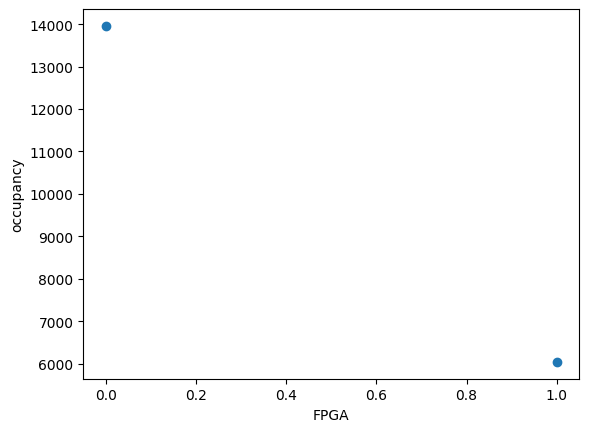

In [15]:
occupancy = np.array([df[df["FPGA"]==fpga]["TDC_MEAS"].shape[0] for fpga in df["FPGA"].drop_duplicates().values])
print(occupancy)

plt.scatter(x=range(len(occupancy)), y=occupancy)
plt.xlabel("FPGA")
plt.ylabel("occupancy")

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)


In [30]:
channel_counter = df.groupby("TDC_CHANNEL").size().sort_values(ascending=False)
print(channel_counter)
print()

print("The three channels with more noise  are: ", channel_counter.head(3).index.values)

TDC_CHANNEL
139    1693
64      996
63      969
61      747
62      731
       ... 
98        9
126       9
55        9
67        8
125       7
Length: 129, dtype: int64

The three channels with more noise  are:  [139  64  63]



9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [31]:
print("The unique orbits are ", ORBIT_CNT.shape[0])
ORBIT_CNT_139 = np.array(df[df["TDC_CHANNEL"]==139]["ORBIT_CNT"].drop_duplicates().values)
print(f"The unique orbits with at least one measurement from channel 139 is: {ORBIT_CNT_139.shape[0]}")

The unique orbits are  200
The unique orbits with at least one measurement from channel 139 is: 200
